# Feature Scaling

a crucial data preprocessing step in machine learning that transforms numerical features to a common scale, preventing features with larger ranges (like income) from dominating those with smaller ranges (like age). This ensures all features contribute equally, leading to better model performance, faster convergence, and more accurate results

There are two types of feature scaling : Standardization  , Normalization

By scaling outliers does not removes.

# 1. Standardization :

 It is very effective technique which re scales a feature value so that it has distribution with 0 mean value and variance equals to 1

X = (x - mean)/ standard deviation

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [42]:
dataset = pd.read_csv("loan.csv")
dataset.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,NaN,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,NaN,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [43]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     16
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [44]:
dataset["LoanAmount"].fillna(dataset["LoanAmount"].mean(),inplace=True)
dataset.isnull().sum()

/tmp/ipykernel_6555/3485266691.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["LoanAmount"].fillna(dataset["LoanAmount"].mean(),inplace=True)


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     16
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

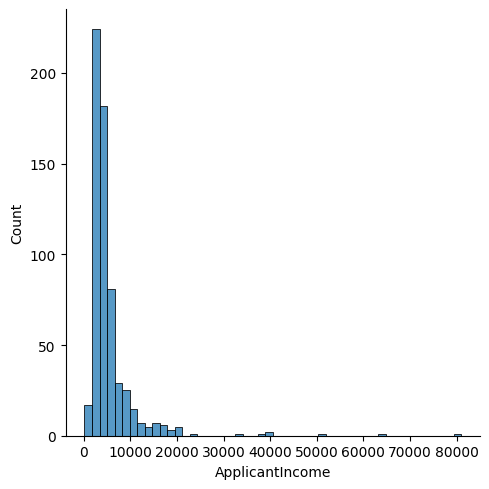

In [45]:
# Checking outliers :

sns.displot(dataset["ApplicantIncome"])
plt.show()

In [46]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,598.000000,564.000000
mean,5403.459283,1621.245798,146.412162,341.939799,0.842199
std,6109.041673,2926.248369,84.037468,65.221050,0.364878
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [47]:
#  scaling :

from sklearn.preprocessing import StandardScaler


ss = StandardScaler()
ss.fit(dataset[["ApplicantIncome"]])
transformed_AI = ss.transform(dataset[["ApplicantIncome"]]) # its n array now transform it to dataframe

dataset["ApplicantIncome_ss"] = pd.DataFrame(transformed_AI) 

dataset


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_ss
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,NaN,1.0,Urban,Y,0.072991
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,NaN,1.0,Rural,N,-0.134412
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,-0.393747
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,-0.462062
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,0.097728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y,-0.410130
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y,-0.212557
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y,0.437174
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y,0.357064


In [48]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,ApplicantIncome_ss
count,614.000000,614.000000,614.000000,598.000000,564.000000,6.140000e+02
mean,5403.459283,1621.245798,146.412162,341.939799,0.842199,-4.339634e-18
std,6109.041673,2926.248369,84.037468,65.221050,0.364878,1.000815e+00
min,150.000000,0.000000,9.000000,12.000000,0.000000,-8.606493e-01
25%,2877.500000,0.000000,100.250000,360.000000,1.000000,-4.138159e-01
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000,-2.606393e-01
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000,6.414426e-02
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.238462e+01


nature of data is same after scaling

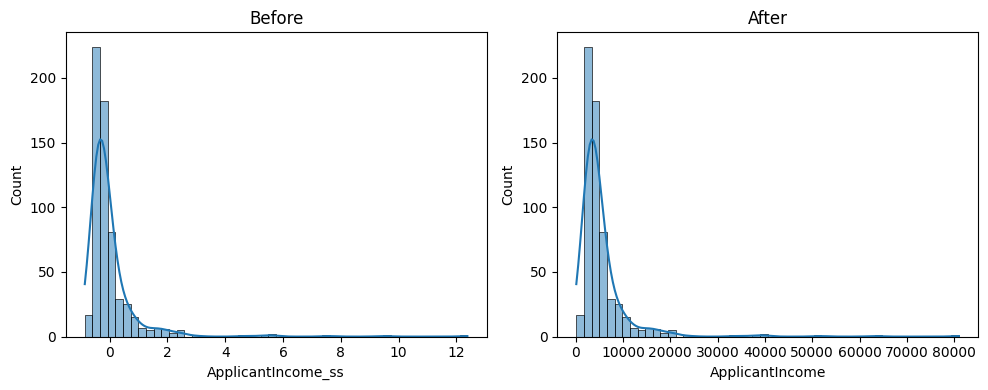

In [ ]:

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.title("Before")
sns.histplot(dataset["ApplicantIncome_ss"], kde=True)

plt.subplot(1, 2, 2)
plt.title("After")
sns.histplot(dataset["ApplicantIncome"], kde=True)

plt.tight_layout()
plt.show()


# 2. Normalization :

It is a scaling technique in which values are shifted and rescaled so they end up ranging between 0 and 1 . It is also known as Min-Max scaling.

X(new) = (x - min(x))/max(x) - min(x)

In [53]:
dataset2 = pd.read_csv("loan.csv")
dataset2.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,NaN,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,NaN,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [54]:
# now working on coapplicantIncome

dataset2.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,598.000000,564.000000
mean,5403.459283,1621.245798,146.412162,341.939799,0.842199
std,6109.041673,2926.248369,85.587325,65.221050,0.364878
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.000000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,168.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


/tmp/ipykernel_6555/307874808.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset2["CoapplicantIncome"])


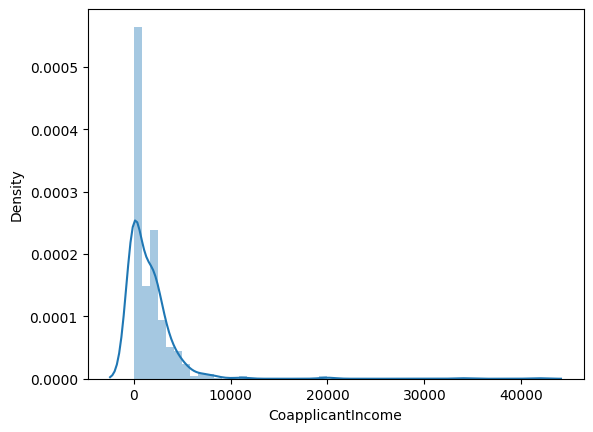

In [56]:
sns.distplot(dataset2["CoapplicantIncome"])
plt.show()
            

In [60]:
# Minmax Scaling

from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

ms.fit(dataset2[["CoapplicantIncome"]])

transformed_CI = ms.transform(dataset2[["CoapplicantIncome"]])

dataset2["CoapplicantIncome_MS"] = pd.DataFrame(transformed_CI)

In [62]:
dataset2.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,CoapplicantIncome_MS
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,NaN,1.0,Urban,Y,0.000000
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,NaN,1.0,Rural,N,0.036192
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,0.000000
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0.056592
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0.000000
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,0.100703
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y,0.036384
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N,0.060096
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y,0.036624
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N,0.263230


/tmp/ipykernel_6555/2443663283.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset2["CoapplicantIncome"])
/tmp/ipykernel_6555/2443663283.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset2["CoapplicantIncome_MS"])


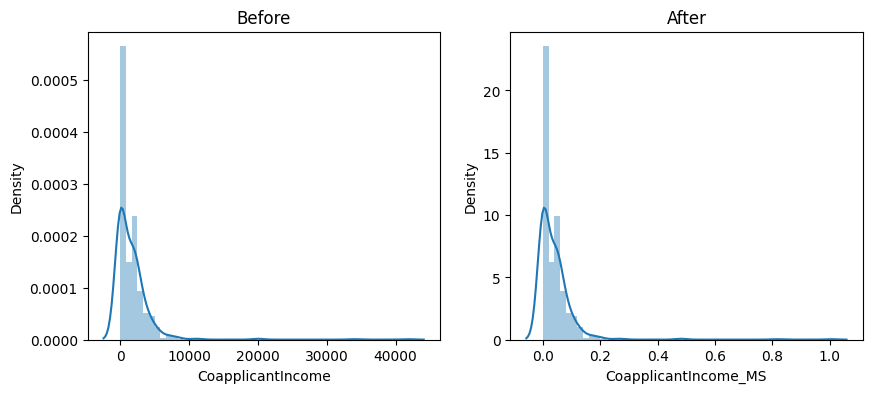

In [70]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1) # parameters : nrows,ncols,index
plt.title("Before")
sns.distplot(dataset2["CoapplicantIncome"])


plt.subplot(1,2,2)
plt.title("After")

sns.distplot(dataset2["CoapplicantIncome_MS"])
plt.show()
